In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [3]:
data = pd.read_csv('winequality.csv')
data.head()
#a dataset, which tells the quality of wine based on various factors in the wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
data.describe()
#no out liners or extream values are present, as we can see from minimum
#, maximum and std rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [5]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.071747
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.139517
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.150460
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057283
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.199485


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
pos = data[['quality']] == 1

pos_n = 0;
pos.iloc[:,0]

for i in range(pos.shape[0]):
    if pos.iloc[i][0] == True:
        pos_n+=1
        
print('Positive_count = ',pos_n)
print('Negative_count = ',pos.shape[0] - pos_n)

Positive_count =  217
Negative_count =  1382


so out of 1599 examples, we have only 217 positive datasets, and rest are negative

In [8]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]
# X = Training Features, y = Target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [9]:
model = DecisionTreeClassifier()

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
y_prd = model.predict(X_test)
print(f1_score(y_test,y_prd))
print(confusion_matrix(y_test,y_prd))


0.5454545454545454
[[368  45]
 [ 25  42]]


In [13]:

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

accuracy with default Hyperparameters

In [14]:
# tweeking Hyperparameters to get the best f1 score, for this dataset
# as no. of positives is very less than no. negatives, it is better to find f1 scores

#here, we are iterating over possible values of hyperparameneters,train model, then test it on testing dataset, then find
#f1-score and finding the best hyperparameters so that the model has optimul bias and variance
max_depth = list(range(5,20))#values for max_depth
leaves = list(range(20,125))  #values for max_leaf_nodes
Min_sample_leaf = list(range(1,50)) #values for min_sapmles_leaf

best_score = 0;
best_max_depth = 0;
best_max_leaf_nodes = 0;
best_min_sample_leaf = 0;


for dp in range(len(max_depth)):
    for lev in range(len(leaves)):
        for sl in range(len(Min_sample_leaf)):
            model = DecisionTreeClassifier(max_depth = max_depth[dp], max_leaf_nodes= leaves[lev],min_samples_leaf = Min_sample_leaf[sl])
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
            
            score = f1_score(y_test,y_pred)
            
            if(score > best_score):
                print(score)
                best_score = score
                best_max_depth = max_depth[dp]
                best_max_leaf_nodes = leaves[lev]
                best_min_sample_leaf = Min_sample_leaf[sl]
                
print( best_score,'depth=', best_max_depth,'max_leaf_nodes=', best_max_leaf_nodes,'min_sample_leaf=',best_min_sample_leaf)
            

0.45045045045045046
0.4590163934426229
0.47154471544715443
0.4736842105263158
0.48
0.4920634920634921
0.5
0.5087719298245613
0.5161290322580644
0.5196850393700787
0.5203252032520325
0.5245901639344261
0.532258064516129
0.5409836065573771
0.5454545454545454
0.5468749999999999
0.5606060606060606
0.5625
0.5671641791044776
0.5797101449275361
0.5899280575539567
0.5945945945945946
0.5972222222222222
0.6056338028169014
0.6122448979591838
0.6301369863013699
0.6301369863013699 depth= 11 max_leaf_nodes= 95 min_sample_leaf= 1



Here, with the above printed hyperparameteres, we are getting the highest f1 score.
Hence we found the best model with optimal bias and variance.

[Text(172.32352941176472, 201.90857142857143, 'X[10] <= 11.55\ngini = 0.232\nsamples = 1119\nvalue = [969, 150]'),
 Text(108.31764705882354, 170.84571428571428, 'X[1] <= 0.335\ngini = 0.135\nsamples = 951\nvalue = [882, 69]'),
 Text(39.38823529411765, 139.78285714285715, 'X[9] <= 0.745\ngini = 0.405\nsamples = 103\nvalue = [74, 29]'),
 Text(19.694117647058825, 108.72, 'gini = 0.245\nsamples = 49\nvalue = [42, 7]'),
 Text(59.082352941176474, 108.72, 'gini = 0.483\nsamples = 54\nvalue = [32, 22]'),
 Text(177.24705882352941, 139.78285714285715, 'X[9] <= 0.645\ngini = 0.09\nsamples = 848\nvalue = [808, 40]'),
 Text(98.47058823529412, 108.72, 'X[6] <= 35.5\ngini = 0.036\nsamples = 546\nvalue = [536, 10]'),
 Text(59.082352941176474, 77.65714285714284, 'X[5] <= 11.5\ngini = 0.073\nsamples = 238\nvalue = [229, 9]'),
 Text(39.38823529411765, 46.59428571428572, 'X[4] <= 0.073\ngini = 0.033\nsamples = 178\nvalue = [175, 3]'),
 Text(19.694117647058825, 15.531428571428563, 'gini = 0.113\nsamples = 

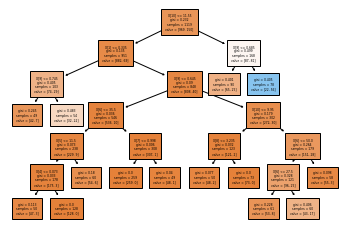

In [15]:
tree.plot_tree(model, filled=True, fontsize=3)

# Random Forest

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('winequality.csv')
data.head()


#same data as above

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)


In [4]:
model = RandomForestClassifier()

In [5]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [6]:
y_pred = model.predict(X_test)

In [7]:
f1_score(y_test,y_pred)

0.6333333333333333

In [10]:
# tweeking Hyperparameters to get the best f1 score, for this dataset
n = list(range(5,120,5))
max_depth = list(range(5,20))#values for max_depth


best_score = 0;
best_n = 0;
best_max_depth = 0;
best_max_leaf_nodes = 0;
best_min_sample_leaf = 0;

for ne in range(len(n)):
    for dp in range(len(max_depth)):
        
        model = RandomForestClassifier(n_estimators = n[ne],max_depth = max_depth[dp],n_jobs = -1)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        score = f1_score(y_test,y_pred)

        if(score > best_score):
            print(score)
            best_score = score
            best_n = n[ne]
            best_max_depth = max_depth[dp]
                   
                
print( best_score,'n= ', best_n,'depth=', best_max_depth,)
            


0.41509433962264153
0.4793388429752066
0.5486725663716815
0.6016260162601625
0.608
0.6341463414634146
0.6446280991735536
0.6446280991735536 n=  30 depth= 17 max_leaf_nodes=


Here, with the above printed hyperparameteres, we are getting the highest f1 score.
Hence we found the best model with optimal bias and variance.

For this data set, we can we that the f1 score of random forest is higher than that of a decision tree.

In [11]:
final_model= RandomForestClassifier(n_estimators  = 30, max_depth = 17)

In [12]:
final_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=17, n_estimators=30)

In [13]:
y_pred = model.predict(X_test)

In [16]:
confusion_matrix(y_test,y_pred)

array([[394,  14],
       [ 34,  38]], dtype=int64)